# 24 Plotting Hypocenters of Earthquakes with PyVista

## Set File Paths

If you downloaded the latest `GemGIS` from the Github repository, append the path so that the package can be imported successfully. In addition, the file path to the files within the `gemgis_data` folder is set. You can download the data [here](https://github.com/cgre-aachen/gemgis_data/archive/master.zip) if you have not done so.

In [1]:
import sys
sys.path.append('../../../../gemgis')
file_path ='../../../../gemgis_data/data/24_plotting_hypocenters_of_earthquakes/'

## Load Earthquake Data

The data used here was obtained from the earthquake catalog of the Earthquake Station of the University of Cologne in Bensberg (http://www.seismo.uni-koeln.de/catalog/index.htm) 

In [2]:
import gemgis as gg
import pandas as pd

data = pd.read_csv(file_path + 'earthquakes_aachen.csv', delimiter=';').dropna()
data.head(15)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


,Date,Y,X,Z,RASTERVALU,Tiefe [km],Magnitude,Epizentrum
0,01.01.2002,50.94,6.48,-8249.25,150.75,8.40,1.5,STETTERNICH
1,01.01.2014,50.94,6.48,89.63,89.63,0.00,0.8,SOPHIENHOEHE
2,01.03.2007,50.86,6.25,-14056.14,143.86,14.20,2.2,ALSDORF
3,01.04.1999,50.93,6.46,-8124.22,275.78,8.40,1.7,STETTERNICH
4,01.04.1999,50.94,6.45,-5329.58,270.42,5.60,1.9,STETTERNICH
5,01.04.1999,50.74,6.20,-9037.71,262.29,9.30,0.6,S. KLEVE
6,01.05.1992,50.87,6.18,-5832.55,167.45,6.00,-,ALSDORF
7,01.05.2005,50.92,6.12,-16479.00,121.00,16.60,1.8,UEBACH-PALENBERG
8,01.07.2002,50.82,6.37,-10876.79,123.21,11.00,1.8,LANGERWEHE
9,01.07.2002,50.83,6.36,-11078.29,121.71,11.20,1.6,LANGERWEHE


In [3]:
data = data[data['Magnitude'] != '-']
data = data[data['Tiefe [km]'] != '-']
data.head(10)

,Date,Y,X,Z,RASTERVALU,Tiefe [km],Magnitude,Epizentrum
0,01.01.2002,50.94,6.48,-8249.25,150.75,8.40,1.5,STETTERNICH
1,01.01.2014,50.94,6.48,89.63,89.63,0.00,0.8,SOPHIENHOEHE
2,01.03.2007,50.86,6.25,-14056.14,143.86,14.20,2.2,ALSDORF
3,01.04.1999,50.93,6.46,-8124.22,275.78,8.40,1.7,STETTERNICH
4,01.04.1999,50.94,6.45,-5329.58,270.42,5.60,1.9,STETTERNICH
5,01.04.1999,50.74,6.20,-9037.71,262.29,9.30,0.6,S. KLEVE
7,01.05.2005,50.92,6.12,-16479.00,121.00,16.60,1.8,UEBACH-PALENBERG
8,01.07.2002,50.82,6.37,-10876.79,123.21,11.00,1.8,LANGERWEHE
9,01.07.2002,50.83,6.36,-11078.29,121.71,11.20,1.6,LANGERWEHE
10,01.07.2010,50.90,6.38,-13712.71,87.29,13.80,0.4,S. JUELICH


In [4]:
data['Magnitude'] = pd.to_numeric(data['Magnitude'])
data['Tiefe [km]'] = pd.to_numeric(data['Tiefe [km]'])
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = pd.DatetimeIndex(data['Date']).year

data['X'] = pd.to_numeric(data['X'])
data['Y'] = pd.to_numeric(data['Y'])
data['Z'] = pd.to_numeric(data['Z'])

## Converting Pandas DataFrame to GeoDataFrame and reproject coordinates

In [5]:
import geopandas as gpd
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.X, data.Y), crs='EPSG:4326').to_crs('EPSG:4647').reset_index()

gdf = gg.vector.extract_xy(gdf=gdf, reset_index=True)
gdf.head()

,Date,Y,X,Z,RASTERVALU,Tiefe [km],Magnitude,Epizentrum,Year,geometry
0,2002-01-01,5645741.63,32322660.15,-8249.25,150.75,8.40,1.50,STETTERNICH,2002,POINT (32322660.151 5645741.630)
1,2014-01-01,5645947.18,32323159.51,89.63,89.63,0.00,0.80,SOPHIENHOEHE,2014,POINT (32323159.505 5645947.183)
2,2007-01-03,5637979.08,32306261.57,-14056.14,143.86,14.20,2.20,ALSDORF,2007,POINT (32306261.571 5637979.080)
3,1999-01-04,5645345.19,32321239.77,-8124.22,275.78,8.40,1.70,STETTERNICH,1999,POINT (32321239.770 5645345.189)
4,1999-01-04,5645698.15,32320689.25,-5329.58,270.42,5.60,1.90,STETTERNICH,1999,POINT (32320689.249 5645698.148)


## Loading WMS Data for Plotting

In [6]:
wms = gg.web.load_wms(url='https://ows.terrestris.de/osm/service?')

In [7]:
wms_map = gg.web.load_as_array(url=wms.url,
                               layer='OSM-WMS', 
                               style='default', 
                               crs='EPSG:4647', 
                               bbox=[32286000,32328000, 5620000,5648000],
                               size=[4200, 2800], 
                               filetype='image/png')

## Plotting the data

<AxesSubplot:>

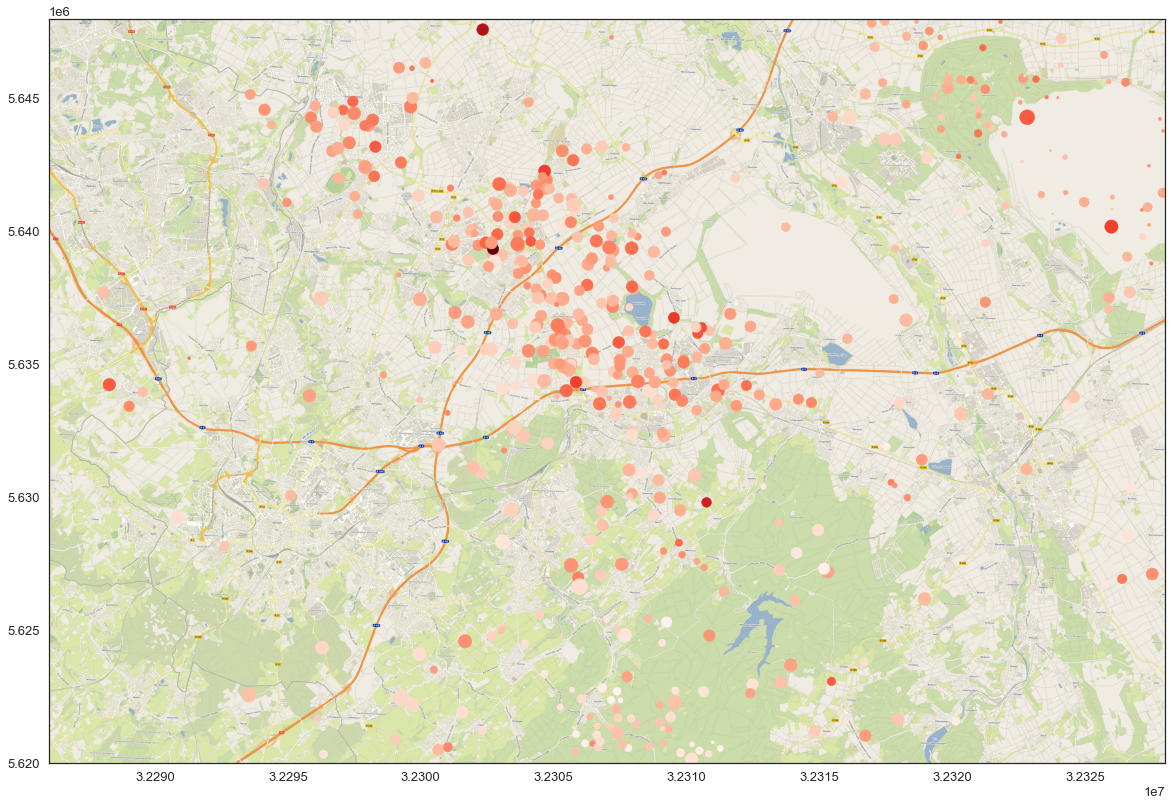

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(20,20))

ax.imshow(wms_map, extent=[32286000,32328000, 5620000,5648000])
gdf.plot(ax=ax, aspect='equal', column='Magnitude', cmap='Reds', markersize = gdf['Tiefe [km]'].values*10)

## Create PyVista Spheres

In [9]:
import pyvista as pv

test = pv.Sphere(radius=1000, center=gdf.loc[0][['X', 'Y', 'Z']].tolist())
test

PolyData (0x1ed43dc52e0)
  N Cells:	1680
  N Points:	842
  X Bounds:	3.232e+07, 3.232e+07
  Y Bounds:	5.645e+06, 5.647e+06
  Z Bounds:	-9.249e+03, -7.249e+03
  N Arrays:	1

In [10]:
import numpy as np

spheres = [pv.Sphere(radius=gdf.loc[i]['Magnitude']*200, center=gdf.loc[i][['X', 'Y', 'Z']].tolist()) for i in range(len(gdf))]

for i in range(len(spheres)):
    spheres[i]['Magnitude'] = np.zeros(len(spheres[i].points)) + gdf.loc[i]['Magnitude']
    spheres[i]['Year'] = np.zeros(len(spheres[i].points)) + gdf.loc[i]['Year']

In [17]:
sargs = dict(fmt="%.1f", color='black')

p = pv.Plotter(notebook=True)

for i in spheres:
    p.add_mesh(i,scalars='Magnitude', cmap='Reds', clim=[0,6],scalar_bar_args=sargs)

p.set_background('white')
p.show_grid(color='black')
p.show()

[(32363486.366218388, 5720129.039074488, 18241.40902984154),
 (32308020.0, 5634229.5, -12003.944763183594),
 (-0.1755904111300614, -0.22414594701532373, 0.9586065939454931)]